In [7]:
from objective_weights_mcda.mcda_methods import VIKOR
from objective_weights_mcda.additions import rank_preferences
from objective_weights_mcda import correlations as corrs
from objective_weights_mcda import normalizations as norm_methods
from objective_weights_mcda import weighting_methods as mcda_weights

In [6]:
pip install objective_weights_mcda

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
criteria_presentation = pd.read_csv("criteria.csv", index_col = 'Cj')
criteria_presentation

,Name,Unit,Type
Cj,,,
C1,lead_time_in_days,days,-1
C2,quantity,number,1
C3,unit_price,dollars,-1
C4,total_sales,number,1
C5,esg_score,decimal,-1


In [11]:
data_presentation = pd.read_csv("parts.csv", index_col = 'Ai')
data_presentation

,Name,C1 esg_score,C2 lead_time_in_days,C3 quantity,C4 unit_price,C5 total_sales
Ai,,,,,,
A1,SUPPLIER 1 Air Filter,2.331000,110.166667,12621.00000,39.166667,505947.5000
A2,SUPPLIER 1 Airbag,2.113000,100.833333,11927.66667,42.000000,508156.1667
A3,SUPPLIER 1 Clutch,2.287400,63.600000,11054.40000,40.400000,441880.4000
A4,SUPPLIER 1 Fuel Filter,2.113000,160.333333,10571.33333,31.000000,317330.6667
A5,SUPPLIER 1 Head Light,2.385500,148.875000,11514.50000,37.125000,433084.3750
A6,SUPPLIER 1 Tyre,2.549000,83.600000,11250.60000,30.600000,342898.2000
A7,SUPPLIER 10 Air Filter,6.776000,46.000000,12436.00000,34.000000,422824.0000
A8,SUPPLIER 10 Airbag,6.776000,59.000000,11631.66667,33.333333,391643.3333
A9,SUPPLIER 10 Clutch,7.122500,118.100000,12155.00000,35.900000,430679.1000


In [12]:
# Load data from CSV
filename = "dataset_parts.csv"
data = pd.read_csv(filename, index_col = 'Ai')
# Load decision matrix from CSV
df_data = data.iloc[:len(data) - 1, :]
# Criteria types are in the last row of CSV
types = data.iloc[len(data) - 1, :].to_numpy()

# Convert decision matrix from dataframe to numpy ndarray type for faster calculations.
matrix = df_data.to_numpy()

# Symbols for alternatives Ai
list_alt_names = [r'$A_{' + str(i) + '}$' for i in range(1, df_data.shape[0] + 1)]
# Symbols for columns Cj
cols = [r'$C_{' + str(j) + '}$' for j in range(1, data.shape[1] + 1)]
print('Decision matrix')
df_data

Decision matrix


,C1,C2,C3,C4,C5
Ai,,,,,
A1,2.331000,110.166667,12621.00000,39.166667,505947.5000
A2,2.113000,100.833333,11927.66667,42.000000,508156.1667
A3,2.287400,63.600000,11054.40000,40.400000,441880.4000
A4,2.113000,160.333333,10571.33333,31.000000,317330.6667
A5,2.385500,148.875000,11514.50000,37.125000,433084.3750
A6,2.549000,83.600000,11250.60000,30.600000,342898.2000
A7,6.776000,46.000000,12436.00000,34.000000,422824.0000
A8,6.776000,59.000000,11631.66667,33.333333,391643.3333
A9,7.122500,118.100000,12155.00000,35.900000,430679.1000


In [13]:
print('Criteria types')
types

Criteria types


array([-1., -1.,  1., -1.,  1.])

In [14]:
weights = mcda_weights.entropy_weighting(matrix, types)
df_weights = pd.DataFrame(weights.reshape(1, -1), index = ['Weights'], columns = cols)
df_weights

,$C_{1}$,$C_{2}$,$C_{3}$,$C_{4}$,$C_{5}$
Weights,0.532252,0.368305,0.01379,0.031199,0.054454


In [15]:
# Create the VIKOR method object
vikor = VIKOR(normalization_method=norm_methods.minmax_normalization)

# Calculate alternatives preference function values with VIKOR method
pref = vikor(matrix, weights, types)

# rank alternatives according to preference values
rank = rank_preferences(pref, reverse = False)
df_results = pd.DataFrame(index = list_alt_names)
df_results['Pref'] = pref
df_results['Rank'] = rank
df_results

,Pref,Rank
$A_{1}$,0.232813,5
$A_{2}$,0.174005,3
$A_{3}$,0.000000,1
$A_{4}$,0.508905,13
$A_{5}$,0.455024,12
$A_{6}$,0.125168,2
$A_{7}$,0.730422,23
$A_{8}$,0.763466,25
$A_{9}$,0.944524,27
$A_{10}$,0.725524,22


In [16]:
# Create a list with weighting methods that you want to explore
weighting_methods = [
    mcda_weights.entropy_weighting,
    #mcda_weights.std_weighting,
    mcda_weights.critic_weighting,
    mcda_weights.gini_weighting,
    mcda_weights.merec_weighting,
    mcda_weights.stat_var_weighting,
    #mcda_weights.cilos_weighting,
    mcda_weights.idocriw_weighting,
    mcda_weights.angle_weighting,
    mcda_weights.coeff_var_weighting
]

In [17]:
df_weights = pd.DataFrame(index = cols)
df_preferences = pd.DataFrame(index = list_alt_names)
df_rankings = pd.DataFrame(index = list_alt_names)

# Create dataframes for weights, preference function values and rankings determined using different weighting methods
df_weights = pd.DataFrame(index = cols)
df_preferences = pd.DataFrame(index = list_alt_names)
df_rankings = pd.DataFrame(index = list_alt_names)

# Create the VIKOR method object
vikor = VIKOR()
for weight_type in weighting_methods:
    weights = weight_type(matrix, types)
    df_weights[weight_type.__name__[:-10].upper().replace('_', ' ')] = weights
    pref = vikor(matrix, weights, types)
    rank = rank_preferences(pref, reverse = False)
    df_preferences[weight_type.__name__[:-10].upper().replace('_', ' ')] = pref
    df_rankings[weight_type.__name__[:-10].upper().replace('_', ' ')] = rank

In [18]:
df_weights

,ENTROPY,CRITIC,GINI,MEREC,STAT VAR,IDOCRIW,ANGLE,COEFF VAR
$C_{1}$,0.532252,0.303837,0.389838,0.284330,0.336471,0.452171,0.406668,0.383964
$C_{2}$,0.368305,0.226979,0.323822,0.362144,0.154935,0.307125,0.343516,0.328888
$C_{3}$,0.013790,0.165744,0.063629,0.070818,0.151318,0.040299,0.055629,0.064289
$C_{4}$,0.031199,0.168980,0.097205,0.095646,0.196454,0.061817,0.084911,0.096173
$C_{5}$,0.054454,0.134461,0.125507,0.187061,0.160822,0.138588,0.109276,0.126686


In [19]:
df_preferences

,ENTROPY,CRITIC,GINI,MEREC,STAT VAR,IDOCRIW,ANGLE,COEFF VAR
$A_{1}$,0.232813,0.053137,0.227095,0.278626,0.023560,0.191482,0.247436,0.237628
$A_{2}$,0.174005,0.139196,0.182800,0.226206,0.173357,0.144356,0.197567,0.191862
$A_{3}$,0.000000,0.094491,0.000000,0.000000,0.147199,0.000000,0.000000,0.000000
$A_{4}$,0.508905,0.494279,0.612405,0.824938,0.246748,0.524772,0.622969,0.634467
$A_{5}$,0.455024,0.392521,0.522336,0.670438,0.166772,0.438778,0.537991,0.540789
$A_{6}$,0.125168,0.039769,0.121552,0.232613,0.082517,0.140626,0.131497,0.129026
$A_{7}$,0.730422,0.582642,0.656423,0.463440,0.638080,0.714328,0.664587,0.652538
$A_{8}$,0.763466,0.659621,0.711802,0.542943,0.703853,0.762340,0.716014,0.709021
$A_{9}$,0.944524,0.824383,0.899599,0.744963,0.835596,0.930033,0.907163,0.898922
$A_{10}$,0.725524,0.731266,0.703738,0.509726,0.798296,0.730321,0.700168,0.699184


In [20]:
df_rankings

,ENTROPY,CRITIC,GINI,MEREC,STAT VAR,IDOCRIW,ANGLE,COEFF VAR
$A_{1}$,5,3,7,8,1,4,7,7
$A_{2}$,3,9,3,5,9,3,3,4
$A_{3}$,1,4,1,1,5,1,1,1
$A_{4}$,13,19,21,27,12,14,21,21
$A_{5}$,12,14,16,25,8,12,16,17
$A_{6}$,2,2,2,6,3,2,2,2
$A_{7}$,23,22,22,17,22,22,22,22
$A_{8}$,25,24,25,22,25,26,25,25
$A_{9}$,27,27,27,26,27,27,27,27
$A_{10}$,22,26,23,20,26,23,23,23


In [22]:
# Functions for visualizations

def plot_barplot(df_plot, x_name, y_name, title):
    """
    Display stacked column chart of weights for criteria for `x_name == Weighting methods`
    and column chart of ranks for alternatives `x_name == Alternatives`

    Parameters
    ----------
        df_plot : dataframe
            dataframe with criteria weights calculated different weighting methods
            or with alternaives rankings for different weighting methods
        x_name : str
            name of x axis, Alternatives or Weighting methods
        y_name : str
            name of y axis, Ranks or Weight values
        title : str
            name of chart title, Weighting methods or Criteria
    """
    
    list_rank = np.arange(1, len(df_plot) + 1, 1)
    stacked = True
    width = 0.5
    if x_name == 'Alternatives':
        stacked = False
        width = 0.8
    else:
        df_plot = df_plot.T
    ax = df_plot.plot(kind='bar', width = width, stacked=stacked, edgecolor = 'black', figsize = (9,4))
    ax.set_xlabel(x_name, fontsize = 12)
    ax.set_ylabel(y_name, fontsize = 12)

    if x_name == 'Alternatives':
        ax.set_yticks(list_rank)

    ax.set_xticklabels(df_plot.index, rotation = 'horizontal')
    ax.tick_params(axis = 'both', labelsize = 12)

    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
    ncol=4, mode="expand", borderaxespad=0., edgecolor = 'black', title = title, fontsize = 11)

    ax.grid(True, linestyle = '--')
    ax.set_axisbelow(True)
    plt.tight_layout()
    plt.show()


def draw_heatmap(data, title):
    """
    Display heatmap with correlations of compared rankings generated using different methods

    Parameters
    ----------
    data : dataframe
        dataframe with correlation values between compared rankings
    title : str
        title of chart containing name of used correlation coefficient
    """

    plt.figure(figsize = (6, 4))
    sns.set(font_scale=1.0)
    heatmap = sns.heatmap(data, annot=True, fmt=".2f", cmap="RdYlBu",
                          linewidth=0.5, linecolor='w')
    plt.yticks(va="center")
    plt.xlabel('Weighting methods')
    plt.title('Correlation coefficient: ' + title)
    plt.tight_layout()
    plt.show()


def plot_boxplot(data):
    """
    Display boxplot showing distribution of criteria weights determined with different methods.

    Parameters
    ----------
    data : dataframe
        dataframe with correlation values between compared rankings
    """
    
    df_melted = pd.melt(data)
    plt.figure(figsize = (7, 4))
    ax = sns.boxplot(x = 'variable', y = 'value', data = df_melted, width = 0.6)
    ax.grid(True, linestyle = '--')
    ax.set_axisbelow(True)
    ax.set_xlabel('Criterion', fontsize = 12)
    ax.set_ylabel('Different weights distribution', fontsize = 12)
    plt.tight_layout()
    plt.show()


# Create dictionary class
class Create_dictionary(dict):
  
    # __init__ function
    def __init__(self):
        self = dict()
          
    # Function to add key:value
    def add(self, key, value):
        self[key] = value

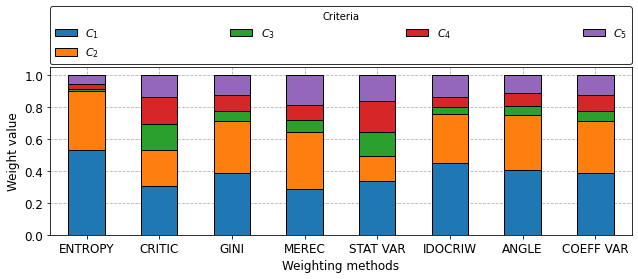

In [23]:
plot_barplot(df_weights, 'Weighting methods', 'Weight value', 'Criteria')

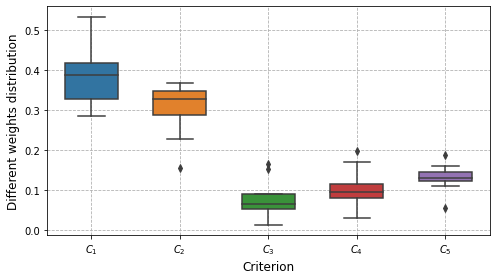

In [24]:
plot_boxplot(df_weights.T)

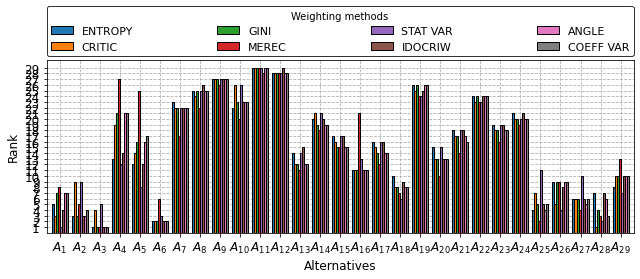

In [25]:
plot_barplot(df_rankings, 'Alternatives', 'Rank', 'Weighting methods')

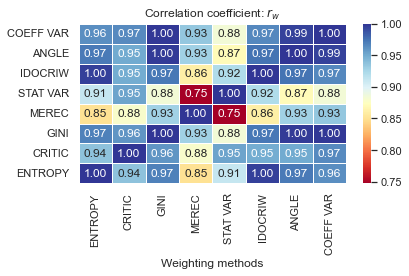

In [26]:
results = copy.deepcopy(df_rankings)
method_types = list(results.columns)
dict_new_heatmap_rw = Create_dictionary()

for el in method_types:
    dict_new_heatmap_rw.add(el, [])

# heatmaps for correlations coefficients
for i, j in [(i, j) for i in method_types[::-1] for j in method_types]:
    dict_new_heatmap_rw[j].append(corrs.weighted_spearman(results[i], results[j]))

df_new_heatmap_rw = pd.DataFrame(dict_new_heatmap_rw, index = method_types[::-1])
df_new_heatmap_rw.columns = method_types

# correlation matrix with rw coefficient
draw_heatmap(df_new_heatmap_rw, r'$r_w$')